# Saturated Goodness of Fit 

A goodness of fit test is designed to detect differences between an observed data set and some probability density model. At some point, you might be interested to know if your model describes the data well - specifically, can you reject the hypothesis that your model is the true model, given the data you observe. As we saw in lectures, the likelihood ratio is a very powerful test-statistic for such tests and we saw that the *saturated-likelihood* can be used as a generic alternate hypothesis for binned likelihood models. 

Suppose we measure the energy of outgoing particles that scatter off a target. We know their incoming energy and hence we measure the distribution of the fraction of that energy which is carried away by the scattered particle. Let the energy fraction be $x\in[0,1]$ and our hypothesis for the distribution is an exponential with slope parameter -2, 

$$
f(x)=Ne^{-2\cdot x}, ~N=2(1-e^{-2})^{-1} \approx 2.313
$$

We bin the observable $x$ into 5 equal width bins in the range $[0,1]$ and count the number of events that fall into each bin. We observe the following counts in the data 9,  6,  4,  5 and 2.

Given $H_0$, the expected counts can be determined as $\lambda_{i}  =  26\times\int_{x_{a_{i}}}^{x_{b_{i}}}f(x)dx$, where $[x_{a_{i}},x_{b_{i}}]$ defines the boundaries of bin $i$ and we've observed 26 events in total.

In [1]:
%matplotlib inline

import numpy
from scipy.stats import poisson
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# observed counts in each bin - norm is what we'll use to obtain lambdas
bin_boundaries = [0 , 0.2, 0.4, 0.6, 0.8, 1]
observations   =  [ 9,  6,  4,  5,  2 ]
norm = sum(observations)

a=2.0
# calculate the pdf of the exponential function 
def exp(x):
  N = a*(1-numpy.exp(-a))**-1
  return N*(numpy.exp(-a*x))
            
# calculate the Poisson parameter for a given bin
# the bin is defined by the range x0->x1
def mean_exp(x0,x1):
  N = a*(1-numpy.exp(-a))**-1
  return (N/a)*(numpy.exp(-a*x0)-numpy.exp(-a*x1))

We can make a plot with histograms to show what our data and model look like. 

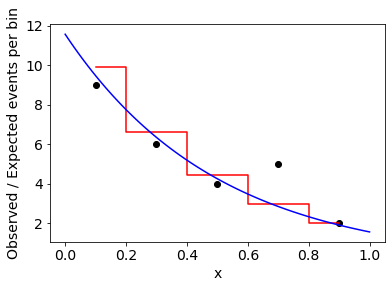

In [2]:
lambdas = [norm*mean_exp(x,x+0.2)  for x in bin_boundaries[0:-1]]

plt.plot([b+0.1 for b in bin_boundaries[0:-1]],observations,\
    marker="o",color="black", linestyle='none')

plt.step([b+0.1 for b in bin_boundaries[0:-1]],\
    lambdas,color="red",where="mid")

# smooth curve 
xrange = numpy.linspace(0,1,100)
plt.plot(xrange,[exp(x)/0.2 for x in xrange],color='blue')
plt.xlabel("x")
plt.ylabel("Observed / Expected events per bin")
plt.savefig("gof_dist.pdf")
plt.show()

Now we define the test-statistic as,

$$
    t= -2\ln\Lambda = -2\ln\frac{L(H_0)}{L(H_1)} = -2\sum_{i} \left(o_{i}\ln(\lambda_{i}) -\lambda_{i}-o_{i}\ln(o_{i}) +o_{i} \right)
$$

In [3]:
# define a log function to handle 0 - will be ==0 by the product
def mlog(o):
  if o==0: return 0
  else: return numpy.log(o)

# define the goodness of fit test likelihood ratio
def testStatistic(observations,lambdas):
  return -2*sum([o*mlog(l) - l - o*mlog(o) + o \
    for o,l in zip(observations,lambdas)])

Plugging in our observation, we can calculate the observed value of our test statistic. 

In [4]:
test_stat_obs = testStatistic(observations,lambdas)
print("Observed test statistic",test_stat_obs)

Observed test statistic 1.3268714146550415


We can generate the distribution of $t=-2\ln\Lambda$ using MC toy data sets to calculate the distribution of $q$. 

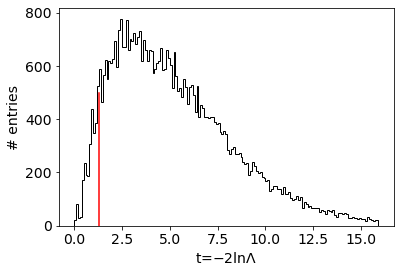

In [5]:
# generate the distributuon of the test stat under our hypothesis
test_stat_toys = [];

for i in range(50000):
  toy_observations = [numpy.random.poisson(l) for l in lambdas]
  test_stat_t = testStatistic(toy_observations,lambdas)
  test_stat_toys.append(test_stat_t)


plt.hist(test_stat_toys, bins=numpy.arange(0,16,0.1), \
    range=(0,16),color='black',histtype='step')

plt.plot([test_stat_obs,test_stat_obs],[0,500],color='red')

plt.xlabel("$x$"); plt.ylabel("Observed/Expected events per bin")
plt.xlabel("t=$-2\ln\Lambda$"); plt.ylabel("# entries")
plt.savefig("gof_ts_dist.pdf")
plt.show()

Suppose we select our Type-I error to be 5%. We can build up the critical region of $t$ starting with largest values first which means we can use $1-F(t)$ to find the critical value $t_{c}$ above which we would reject $H_0$.

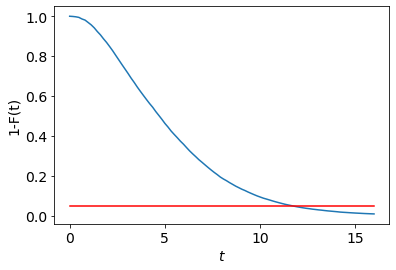

In [6]:
test_stat_toys = numpy.array(test_stat_toys)
xrange = numpy.linspace(0,16,100)

plt.plot(xrange,[1- float(len(test_stat_toys[test_stat_toys < x]))/len(test_stat_toys) for x in xrange])
plt.plot([0,16],[0.05,0.05],color='red')
plt.xlabel("$t$")
plt.ylabel("1-F(t)")
plt.show()

The critical value is something like 12, meaning the critical region for $\alpha=0.05$ is defined by $t>12$. so our data value lies well outside the critical region and we don't reject $H_{0}$ .

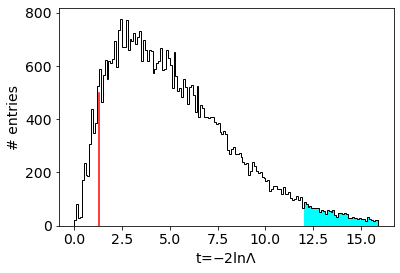

In [9]:

plt.hist(test_stat_toys[test_stat_toys>12], bins=numpy.arange(0,16,0.1), \
    range=(0,16),color='cyan')
plt.hist(test_stat_toys, bins=numpy.arange(0,16,0.1), \
    range=(0,16),color='black',histtype='step')

plt.plot([test_stat_obs,test_stat_obs],[0,500],color='red')
plt.xlabel("$x$"); plt.ylabel("Observed/Expected events per bin")
plt.xlabel("t=$-2\ln\Lambda$"); plt.ylabel("# entries")
plt.savefig("gof_ts_dist.pdf")
plt.show()